In [17]:
import tensorflow as tf
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import HoverTool
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input,Dense, Subtract, Add, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from keras.constraints import maxnorm
from sklearn.linear_model import Lasso
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from math import sqrt


data = pd.read_excel("C:/Users/ERIC/Desktop/PML-06MTP-115/06MTP-115.xlsm", 1)

# Training dataset
x = data.iloc[:, [1,2,26,50]].values
y = data.iloc[:, 74].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0) #try random_state = 42

#Standarization of the data
sc = StandardScaler()
std_x_train = sc.fit_transform(x_train)
std_x_test = sc.fit_transform(x_test)

input_tensor = Input(shape=(x.shape[1],))
#layer_drop = Dropout(0.3)

hidden_layer = Dense(500, activation = 'relu', kernel_constraint=maxnorm(3),#Make better results with Dropout
                     kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01),#To avoid Over-fitting
                     activity_regularizer=regularizers.l1(0.001))(input_tensor) #Regularize the wieghts to have better accuracy
layer_drop = Dropout(0.5)

hidden_layer1 = Dense(500, activation = 'relu',kernel_constraint=maxnorm(3),#Make better results with Dropout
                     kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01),#To avoid Over-fitting
                     activity_regularizer=regularizers.l1(0.01))(hidden_layer) #Regularize the wieghts to have better accuracy
layer_drop1 = Dropout(0.5)

hidden_layer2 = Dense(500, activation = 'relu', kernel_constraint=maxnorm(3),#Make better results with Dropout
                     kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01),#To avoid Over-fitting
                     activity_regularizer=regularizers.l1(0.01))(hidden_layer1) #Regularize the wieghts to have better accuracy
layer_drop2 = Dropout(0.5)

output_tensor = Dense(1)(hidden_layer2)

model = Model(input_tensor, output_tensor)

model.compile(optimizer= 'adam',  loss='mean_absolute_error', metrics = ['mean_absolute_error'])

#monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto', 
                        #restore_best_weights = True)

model.summary()

history = model.fit(x_train,
          y_train,
          #validation_data = (x_test, y_test),
          #callbacks = [monitor],
          epochs=100,
          batch_size = 3,
          validation_split = 0.1,
          verbose=True)

pred = model.predict(x_test)
score = np.sqrt(mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_54 (Dense)             (None, 500)               2500      
_________________________________________________________________
dense_55 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_56 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 501       
Total params: 504,001
Trainable params: 504,001
Non-trainable params: 0
_________________________________________________________________
Train on 12 samples, validate on 2 samples
Epoch 1/100
12/12 [==============================] - 2s 174ms/sample - loss

12/12 [==============================] - 0s 6ms/sample - loss: 227.3836 - mean_absolute_error: 73.8322 - val_loss: 426.2120 - val_mean_absolute_error: 288.0822
Epoch 43/100
12/12 [==============================] - 0s 6ms/sample - loss: 223.4770 - mean_absolute_error: 83.5644 - val_loss: 377.2684 - val_mean_absolute_error: 233.0319
Epoch 44/100
12/12 [==============================] - 0s 6ms/sample - loss: 190.4535 - mean_absolute_error: 43.1803 - val_loss: 316.2494 - val_mean_absolute_error: 164.2180
Epoch 45/100
12/12 [==============================] - 0s 6ms/sample - loss: 209.1684 - mean_absolute_error: 56.3678 - val_loss: 342.3680 - val_mean_absolute_error: 196.9560
Epoch 46/100
12/12 [==============================] - 0s 6ms/sample - loss: 207.9809 - mean_absolute_error: 69.7799 - val_loss: 410.0929 - val_mean_absolute_error: 278.6564
Epoch 47/100
12/12 [==============================] - 0s 6ms/sample - loss: 201.5327 - mean_absolute_error: 65.8836 - val_loss: 336.9410 - val_mean_

12/12 [==============================] - 0s 6ms/sample - loss: 130.5752 - mean_absolute_error: 45.3354 - val_loss: 305.6731 - val_mean_absolute_error: 222.4876
Epoch 90/100
12/12 [==============================] - 0s 5ms/sample - loss: 133.6522 - mean_absolute_error: 50.8767 - val_loss: 295.5472 - val_mean_absolute_error: 212.0832
Epoch 91/100
12/12 [==============================] - 0s 6ms/sample - loss: 139.8102 - mean_absolute_error: 53.2035 - val_loss: 257.9118 - val_mean_absolute_error: 170.7884
Epoch 92/100
12/12 [==============================] - 0s 5ms/sample - loss: 137.6620 - mean_absolute_error: 53.5715 - val_loss: 301.7468 - val_mean_absolute_error: 220.6007
Epoch 93/100
12/12 [==============================] - 0s 6ms/sample - loss: 129.7338 - mean_absolute_error: 46.8869 - val_loss: 288.9660 - val_mean_absolute_error: 206.8627
Epoch 94/100
12/12 [==============================] - 0s 6ms/sample - loss: 134.6821 - mean_absolute_error: 51.2839 - val_loss: 292.7184 - val_mean_

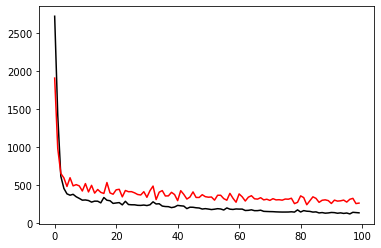

In [22]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.plot(loss_values, 'k', label = 'training_loss')
plt.plot(val_loss_values, 'r', label = 'val training loss')